# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
japanize_matplotlib.japanize()

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [8]:
print(pd.DataFrame(df_data.head(5)))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [9]:
print(df_data.shape)

(150, 4)


1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [10]:
print(pd.DataFrame(df_data.describe()))

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


1.4. `df_data` に欠損値がないかを確認しましょう。

In [11]:
print(df_data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [12]:
print(df_target.sample(n=10))

     target
121       2
28        0
127       2
54        1
87        1
60        1
5         0
70        1
100       2
104       2


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

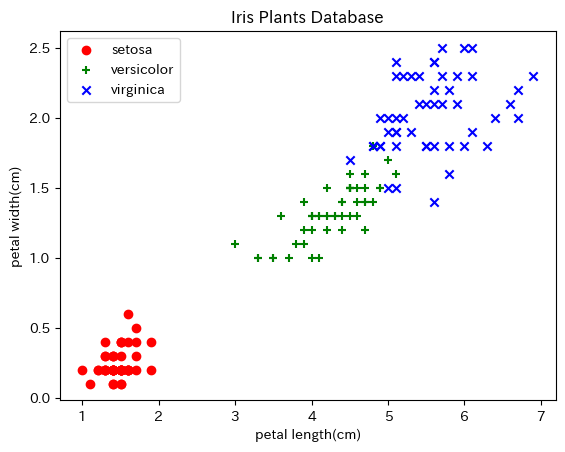

In [13]:
plt.title("Iris Plants Database")
plt.xlabel("petal length(cm)")
plt.ylabel("petal width(cm)")

df_bond = pd.concat([df_data,df_target],axis=1)
df_bond0 = df_bond.query("target == 0")
df_bond1 = df_bond.query("target == 1")
df_bond2 = df_bond.query("target == 2")

plt.scatter(df_bond0["petal length (cm)"],df_bond0["petal width (cm)"],label="setosa",color="r",marker="o")
plt.scatter(df_bond1["petal length (cm)"],df_bond1["petal width (cm)"],label="versicolor",color="g",marker="+")
plt.scatter(df_bond2["petal length (cm)"],df_bond2["petal width (cm)"],label="virginica",color="b",marker="x")
plt.legend()

## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [14]:
x = df_data
y = df_target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

4.2. 本当に4:1に分割できているか確認しましょう。

In [15]:
print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    x_test.shape
)

(120, 4) (30, 4) (120, 1) (30, 4)


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [16]:
from sklearn.linear_model import LinearRegression
iris_model = LinearRegression()

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [17]:
iris_model.fit(x_train,y_train)

LinearRegression()

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [26]:
import numpy as np
x_test_calculated = (iris_model.predict(x_test)).tolist()

import itertools
y_pred = list(itertools.chain.from_iterable(x_test_calculated))
y_pred_list = list(map(int,y_pred))

print(y_pred_list)

[2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]


6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [24]:
from sklearn.metrics import accuracy_score
y_test_list = list(y_test["target"].to_list())
print(y_test_list)
print(accuracy_score(y_test_list, y_pred_list))


[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0]
1.0


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。